In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
import numpy as np
import random
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from tensorflow.keras.applications import VGG16

In [ ]:
# L§y c¡c đường d¤n đ‚n £nh.
image_path = list(paths.list_images('/content/gdrive/MyDrive/train_cnn_doan/data/'))

# for i in image_path:
#   print(i)
# print(len(image_path))

In [ ]:
# ĐŒi vị tr‰ ng¤u nhi¶n c¡c đường d¤n £nh
random.shuffle(image_path)

In [ ]:
# Đường d¤n £nh s‡ là dataset/t¶n_loài_hoa/t¶n_£nh v‰ dụ dataset/Bluebell/image_0241.jpg n
# labels = [p.split(os.path.sep)[-2] for p in image_path]
# đây là nhãn ( tên folder chứa các ký tự )
labels = []
labels1 = []
for p in image_path:
  labels.append(p.split(os.path.sep)[-2])
  labels1.append(p.split(os.path.sep)[-2])
print(labels)
print(len(labels))

['2', '0', '0', '69', '0', '85', '9', '65', '8', '67', '68', '0', '89', '8', '72', '1', '1', '71', '9', '1', '65', '89', '80', '1', '9', '0', '80', '69', '3', '68', '72', '1', '9', '69', '0', '78', '80', '67', '78', '72', '1', '89', '72', '1', '1', '6', '69', '69', '68', '67', '0', '68', '1', '65', '85', '0', '69', '70', '66', '8', '3', '68', '69', '4', '0', '70', '2', '5', '6', '6', '8', '4', '0', '77', '69', '1', '80', '78', '5', '9', '69', '1', '5', '66', '1', '2', '6', '78', '0', '5', '7', '80', '8', '7', '9', '70', '78', '69', '8', '69', '9', '3', '66', '1', '68', '65', '6', '72', '0', '2', '3', '72', '0', '65', '2', '82', '75', '2', '72', '72', '65', '3', '88', '80', '6', '0', '8', '80', '1', '76', '3', '72', '66', '0', '68', '78', '9', '0', '9', '6', '5', '68', '0', '90', '65', '68', '88', '66', '8', '72', '89', '88', '8', '8', '72', '9', '5', '66', '8', '9', '0', '8', '78', '9', '76', '88', '0', '90', '67', '82', '2', '1', '69', '2', '88', '68', '2', '5', '82', '9', '89', '8', 

In [ ]:
# chuyển tên folder thành số
le = LabelEncoder()
print(labels1)
labels = le.fit_transform(labels)
print(labels)

print(len(labels1), len(labels))

['2', '0', '0', '69', '0', '85', '9', '65', '8', '67', '68', '0', '89', '8', '72', '1', '1', '71', '9', '1', '65', '89', '80', '1', '9', '0', '80', '69', '3', '68', '72', '1', '9', '69', '0', '78', '80', '67', '78', '72', '1', '89', '72', '1', '1', '6', '69', '69', '68', '67', '0', '68', '1', '65', '85', '0', '69', '70', '66', '8', '3', '68', '69', '4', '0', '70', '2', '5', '6', '6', '8', '4', '0', '77', '69', '1', '80', '78', '5', '9', '69', '1', '5', '66', '1', '2', '6', '78', '0', '5', '7', '80', '8', '7', '9', '70', '78', '69', '8', '69', '9', '3', '66', '1', '68', '65', '6', '72', '0', '2', '3', '72', '0', '65', '2', '82', '75', '2', '72', '72', '65', '3', '88', '80', '6', '0', '8', '80', '1', '76', '3', '72', '66', '0', '68', '78', '9', '0', '9', '6', '5', '68', '0', '90', '65', '68', '88', '66', '8', '72', '89', '88', '8', '8', '72', '9', '5', '66', '8', '9', '0', '8', '78', '9', '76', '88', '0', '90', '67', '82', '2', '1', '69', '2', '88', '68', '2', '5', '82', '9', '89', '8', 

In [ ]:
dict_tmp = {}
for i in range(len(labels1)):
    dict_tmp[labels[i]] = labels1[i]

print(dict_tmp)
print(len(dict_tmp))

{2: '2', 0: '0', 11: '69', 25: '85', 29: '9', 7: '65', 20: '8', 9: '67', 10: '68', 28: '89', 15: '72', 1: '1', 14: '71', 21: '80', 3: '3', 19: '78', 6: '6', 13: '70', 8: '66', 4: '4', 5: '5', 18: '77', 12: '7', 22: '82', 16: '75', 27: '88', 17: '76', 30: '90', 23: '83', 26: '86', 24: '84'}
31


In [ ]:
# One-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)
print(labels.shape)

[[0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1216, 31)


In [ ]:
import cv2

In [ ]:
list_image = []
for (j, imagePath) in enumerate(image_path):
  image = load_img(imagePath, target_size=(28, 28), grayscale= True)
  print(image.size)
  image = img_to_array(image)
  
  print('hihi',image.shape)
  image = np.expand_dims(image, 0)
  # image = imagenet_utils.preprocess_input(image)
  print(image.shape)
  # print(image)
  list_image.append(image)
list_image = np.vstack(list_image)
print(list_image.shape)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (28, 28, 1)
(1, 28, 28, 1)
(28, 28)
hihi (2

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(list_image, labels,test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(list_image, labels,test_size=0.1, random_state=42)
X_train = X_train
X_test = X_test
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(1094, 28, 28, 1)
1094
(122, 28, 28, 1)
122


In [ ]:
# aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, \
aug_train = ImageDataGenerator(rotation_range=30, \
width_shift_range=0.1, height_shift_range=0.1, \
shear_range=0.2, zoom_range=0.2, horizontal_flip=False, \
fill_mode='nearest')

trn_aug = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True,
                             rotation_range=30, width_shift_range=0.1,height_shift_range=0.1,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=False,fill_mode="nearest")
val_aug = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)

In [ ]:
aug_test= ImageDataGenerator()

In [16]:
opt = RMSprop(0.001)
numOfEpoch = 1500
opt = SGD(0.01)
model.compile(opt, 'categorical_crossentropy', ['accuracy'])
H = model.fit_generator(trn_aug.flow(X_train, y_train, batch_size=32),
                        steps_per_epoch=len(X_train)//32,
                        validation_data=(val_aug.flow(X_test, y_test, batch_size=32)),
                        validation_steps=len(X_test)//32
                        ,epochs=numOfEpoch)

Epoch 1/1500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


34/34 [==============================] - 11s 38ms/step - loss: 3.7674 - accuracy: 0.0471 - val_loss: 3.3914 - val_accuracy: 0.0521
Epoch 2/1500
34/34 [==============================] - 1s 24ms/step - loss: 3.3944 - accuracy: 0.0697 - val_loss: 3.3584 - val_accuracy: 0.0521
Epoch 3/1500
34/34 [==============================] - 1s 23ms/step - loss: 3.3595 - accuracy: 0.0782 - val_loss: 3.2954 - val_accuracy: 0.0417
Epoch 4/1500
34/34 [==============================] - 1s 23ms/step - loss: 3.3120 - accuracy: 0.0998 - val_loss: 3.2209 - val_accuracy: 0.0625
Epoch 5/1500
34/34 [==============================] - 1s 23ms/step - loss: 3.2739 - accuracy: 0.0923 - val_loss: 3.2719 - val_accuracy: 0.1875
Epoch 6/1500
34/34 [==============================] - 1s 24ms/step - loss: 3.2115 - accuracy: 0.0979 - val_loss: 3.0744 - val_accuracy: 0.1458
Epoch 7/1500
34/34 [==============================] - 1s 28ms/step - loss: 3.1261 - accuracy: 0.1271 - val_loss: 3.0491 - val_accuracy: 0.2396
Epoch 8/150

In [17]:
model.save('/content/gdrive/MyDrive/train_cnn_doan/save_2.h5', save_format="h5")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


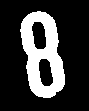

(1, 28, 28, 1)


In [18]:
# path = '/content/gdrive/MyDrive/Doan/data/1/1817.jpg'
# image = load_img(imagePath, target_size=(28, 28), grayscale= True)
# print(image.size)
# image = img_to_array(image)
import cv2
from keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow
import numpy as np
# print(image.shape)
image1 = cv2.imread('/content/gdrive/MyDrive/train_cnn_doan/88.jpg')
# image = load_img('/content/gdrive/MyDrive/Doan/data/65/1800.5.jpg', target_size=(28, 28), grayscale= True)
image = load_img('/content/gdrive/MyDrive/train_cnn_doan/88.jpg', target_size=(28, 28), grayscale= True)
image2 = load_img('/content/gdrive/MyDrive/train_cnn_doan/8.jpg', target_size=(28, 28), grayscale= True)
cv2_imshow(image1)
image = img_to_array(image)
image = np.expand_dims(image, 0)
image2 = img_to_array(image2)
image2 = np.expand_dims(image2, 0)
list_tmp = []
list_tmp.append(image)
list_tmp.append(image2)
list_tmp = np.vstack(list_tmp)

print(image.shape)

In [20]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/train_cnn_doan/save_2.h5')

In [21]:
a = model.predict(list_tmp)
print(a)
prediction = a.argmax(axis=1)
print(prediction)
for i in range(len(prediction)):
  print(dict_tmp[prediction[i]])


[[2.72714379e-10 3.16285649e-16 4.05874573e-14 4.59520269e-12
  2.72100463e-12 1.29496214e-09 3.29078254e-09 1.13844399e-10
  5.47918034e-06 5.78521655e-20 1.22113745e-13 1.82391605e-13
  5.10006634e-19 6.77205621e-17 7.38541953e-12 8.62556097e-15
  2.84878961e-19 1.21792884e-18 4.63754062e-14 1.03081666e-16
  9.99994516e-01 1.13756430e-15 1.79177114e-15 1.71127693e-14
  1.35393207e-19 4.79393077e-15 9.86407719e-17 2.28871115e-17
  2.69765584e-17 2.93375848e-08 5.17002388e-16]
 [1.06576956e-10 4.73257557e-17 2.26029450e-15 1.72331577e-13
  2.15554422e-13 1.18070331e-10 1.21597354e-09 1.90652372e-11
  1.08244221e-05 2.10641806e-21 4.04105799e-14 1.70841091e-14
  1.63892962e-20 1.99587970e-18 5.05534904e-13 3.02756342e-15
  1.60285808e-20 1.17125505e-19 9.66092999e-15 1.87190476e-17
  9.99989152e-01 9.61551272e-17 3.89604742e-16 2.28985272e-16
  4.84511027e-21 5.67964708e-16 8.63182243e-18 1.49570044e-18
  1.37115030e-18 5.66078384e-09 1.92702030e-17]]
[20 20]
8
8
